In [39]:
import numpy as np
import pandas as pd
import os

TRAIN_PATH = os.path.join("datasets", "spaceship", "train.csv")
TEST_PATH = os.path.join("datasets", "spaceship", "test.csv")

train_set = pd.read_csv(TRAIN_PATH)
test_set = pd.read_csv(TEST_PATH)

In [6]:
train_set.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [3]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
train_set.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
train_set.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


In [7]:
train_set['Name'].value_counts()

Gollux Reedall        2
Elaney Webstephrey    2
Grake Porki           2
Sus Coolez            2
Apix Wala             2
                     ..
Jamela Griffy         1
Hardy Griffy          1
Salley Mckinn         1
Mall Frasp            1
Propsh Hontichre      1
Name: Name, Length: 8473, dtype: int64

In [8]:
train_set_oryginal = train_set.copy()
train_set = train_set.drop(['Name'], axis=1)

In [9]:
train_set['PassengerId'].value_counts()

0001_01    1
6136_01    1
6141_01    1
6139_06    1
6139_05    1
          ..
3126_01    1
3124_03    1
3124_02    1
3124_01    1
9280_02    1
Name: PassengerId, Length: 8693, dtype: int64

In [10]:
train_set[['Group', 'Id']] = [passengerid.split('_') for passengerid in train_set['PassengerId']]

In [11]:
train_set.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Group,Id
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004,01


In [12]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Transported   8693 non-null   bool   
 13  Group         8693 non-null   object 
 14  Id            8693 non-null   object 
dtypes: bool(1), float64(6), object(8)
memory usage: 959.4+ KB


In [13]:
train_set["Group"] = pd.to_numeric(train_set["Group"])
train_set["Id"] = pd.to_numeric(train_set["Id"])

In [14]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Transported   8693 non-null   bool   
 13  Group         8693 non-null   int64  
 14  Id            8693 non-null   int64  
dtypes: bool(1), float64(6), int64(2), object(6)
memory usage: 959.4+ KB


In [15]:
train_set["Group"].value_counts()

4498    8
8168    8
8728    8
8796    8
8956    8
       ..
3483    1
3480    1
3478    1
3473    1
4620    1
Name: Group, Length: 6217, dtype: int64

In [16]:
train_set = train_set.drop(['PassengerId', 'Group', 'Id'], axis=1)

In [16]:
train_set.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [17]:
train_set["HomePlanet"].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [18]:
train_set.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


<Axes: xlabel='Transported', ylabel='Count'>

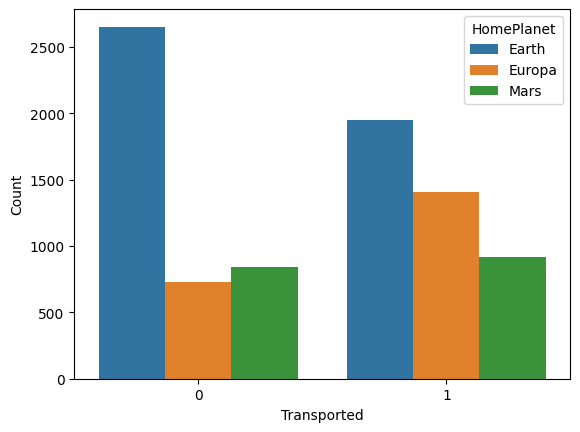

In [19]:
import seaborn as sns

train_set['Transported'] = train_set['Transported'].astype(int)
count_data = train_set[['Transported', 'HomePlanet']].value_counts().reset_index()
count_data.columns = ['Transported', 'HomePlanet', 'Count']
sns.barplot(data=count_data, x='Transported', y='Count', hue='HomePlanet')

<AxesSubplot:xlabel='Transported', ylabel='Count'>

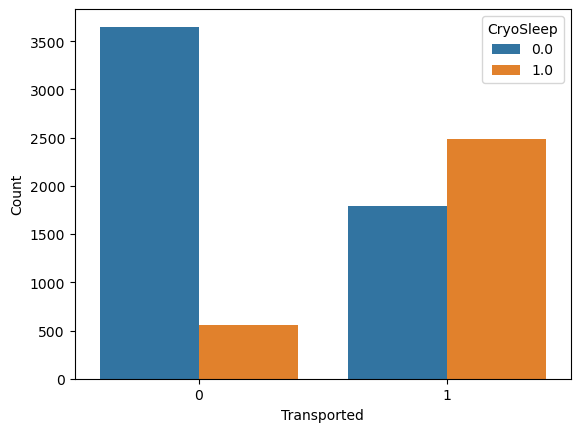

In [20]:
train_set['CryoSleep'] = train_set['CryoSleep'].astype(float)
count_data = train_set[['Transported', 'CryoSleep']].value_counts().reset_index()
count_data.columns = ['Transported', 'CryoSleep', 'Count']
sns.barplot(data=count_data, x='Transported', y='Count', hue='CryoSleep')

In [20]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
home_planet_cat = enc.fit_transform(train_set[['HomePlanet']])

In [21]:
for i, cat in enumerate(enc.categories_):
    train_set[cat] = home_planet_cat.toarray()[:][i]

In [22]:
train_set.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Earth,Europa,Mars,NaN
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1,0.0,1.0,0.0,0.0
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,0.0,1.0,0.0,0.0
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,0.0,1.0,0.0,0.0
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1,0.0,1.0,0.0,0.0


In [23]:
train_set = train_set.drop([np.nan], axis=1)

In [24]:
train_set.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Earth,Europa,Mars
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1,0.0,1.0,0.0
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,0.0,1.0,0.0
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,0.0,1.0,0.0
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1,0.0,1.0,0.0


In [25]:
train_set = train_set.drop(['HomePlanet'], axis=1)

In [26]:
train_set["Cabin"].value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [27]:
train_set[['Deck', 'Num', 'Side']] = [cabin.split('/') if cabin is not np.nan else [np.nan, np.nan, np.nan]
                                      for cabin in train_set['Cabin']]
train_set = train_set.drop(['Num', 'Cabin'], axis=1)

In [28]:
train_set.head()

,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Earth,Europa,Mars,Deck,Side
0,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,B,P
1,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1,0.0,1.0,0.0,F,S
2,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,0.0,1.0,0.0,A,S
3,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,0.0,1.0,0.0,A,S
4,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1,0.0,1.0,0.0,F,S


In [29]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CryoSleep     8476 non-null   object 
 1   Destination   8511 non-null   object 
 2   Age           8514 non-null   float64
 3   VIP           8490 non-null   object 
 4   RoomService   8512 non-null   float64
 5   FoodCourt     8510 non-null   float64
 6   ShoppingMall  8485 non-null   float64
 7   Spa           8510 non-null   float64
 8   VRDeck        8505 non-null   float64
 9   Transported   8693 non-null   int32  
 10  Earth         8693 non-null   float64
 11  Europa        8693 non-null   float64
 12  Mars          8693 non-null   float64
 13  Deck          8494 non-null   object 
 14  Side          8494 non-null   object 
dtypes: float64(9), int32(1), object(5)
memory usage: 984.9+ KB


<Axes: xlabel='Transported', ylabel='Count'>

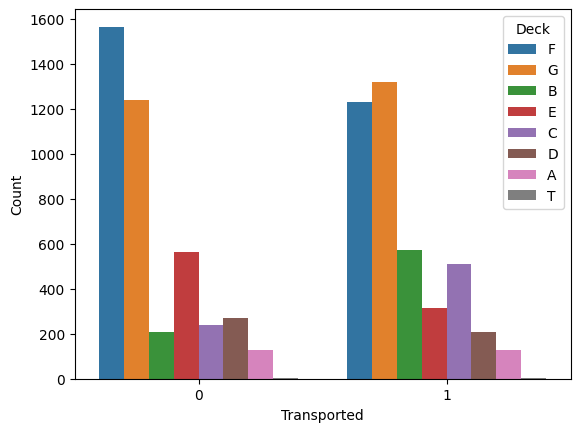

In [30]:
count_data = train_set[['Transported', 'Deck']].value_counts().reset_index()
count_data.columns = ['Transported', 'Deck', 'Count']
sns.barplot(data=count_data, x='Transported', y='Count', hue='Deck')

<Axes: xlabel='Transported', ylabel='Count'>

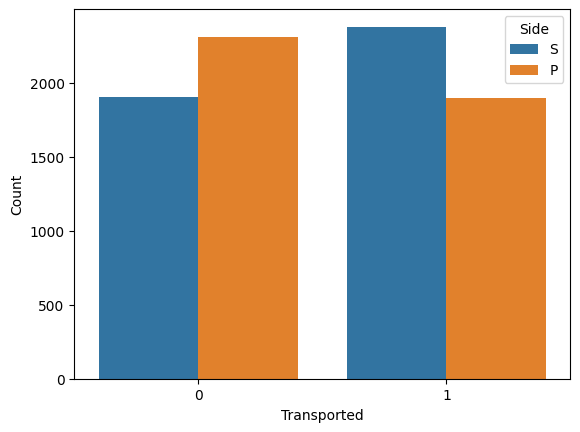

In [31]:
count_data = train_set[['Transported', 'Side']].value_counts().reset_index()
count_data.columns = ['Transported', 'Side', 'Count']
sns.barplot(data=count_data, x='Transported', y='Count', hue='Side')

In [32]:
train_set['Cabin'] = train_set['Deck'] + '/' + train_set['Side']

In [33]:
train_set.head()

,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Earth,Europa,Mars,Deck,Side,Cabin
0,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,B,P,B/P
1,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1,0.0,1.0,0.0,F,S,F/S
2,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,0.0,1.0,0.0,A,S,A/S
3,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,0.0,1.0,0.0,A,S,A/S
4,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1,0.0,1.0,0.0,F,S,F/S


<Axes: xlabel='Transported', ylabel='Count'>

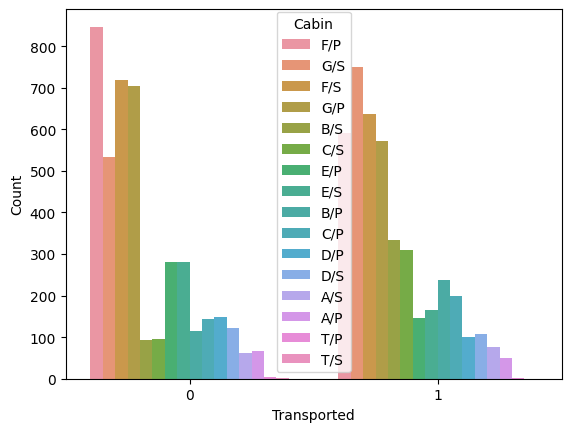

In [34]:
count_data = train_set[['Transported', 'Cabin']].value_counts().reset_index()
count_data.columns = ['Transported', 'Cabin', 'Count']
sns.barplot(data=count_data, x='Transported', y='Count', hue='Cabin')

In [35]:
train_set = train_set.drop(['Cabin'], axis=1)

In [36]:
train_set['Side'] = [1 if side == 'S' else 0 for side in train_set['Side']]

In [40]:
enc = OneHotEncoder()
deck_cat = enc.fit_transform(train_set[['Deck']])
enc.categories_

[array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', nan], dtype=object)]

In [48]:
train_set["B"] = deck_cat.toarray()[:, 1]
train_set["C"] = deck_cat.toarray()[:, 2]
train_set["E"] = deck_cat.toarray()[:, 4]

In [49]:
train_set = train_set.drop(['Deck'], axis=1)

In [50]:
train_set.head()

,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Earth,Europa,Mars,Side,B,C,E
0,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0,1.0,0.0,0.0
1,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1,0.0,1.0,0.0,1,0.0,0.0,0.0
2,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,0.0,1.0,0.0,1,0.0,0.0,0.0
3,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,0.0,1.0,0.0,1,0.0,0.0,0.0
4,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1,0.0,1.0,0.0,1,0.0,0.0,0.0


<Axes: xlabel='Transported', ylabel='Count'>

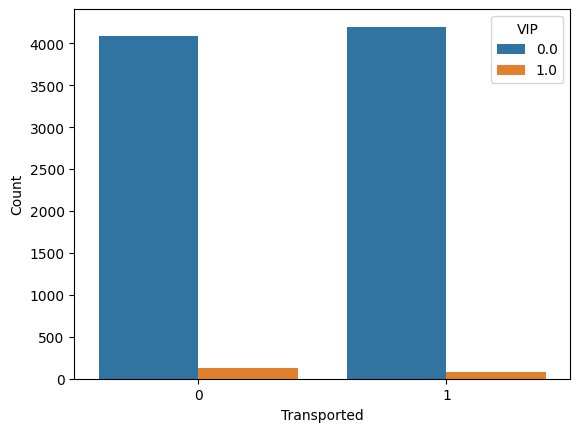

In [51]:
train_set['VIP'] = train_set['VIP'].astype(float)
count_data = train_set[['Transported', 'VIP']].value_counts().reset_index()
count_data.columns = ['Transported', 'VIP', 'Count']
sns.barplot(data=count_data, x='Transported', y='Count', hue='VIP')

In [52]:
train_set['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

<Axes: xlabel='Transported', ylabel='Count'>

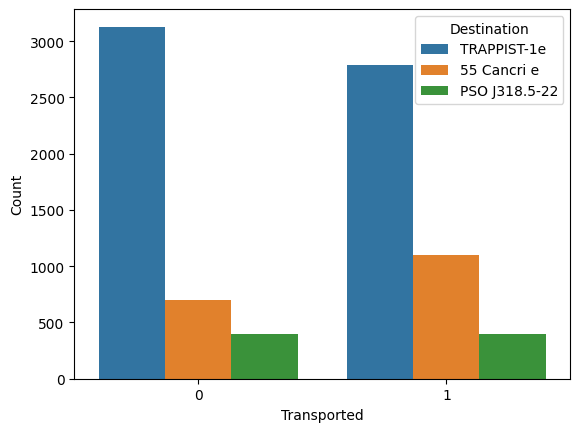

In [53]:
count_data = train_set[['Transported', 'Destination']].value_counts().reset_index()
count_data.columns = ['Transported', 'Destination', 'Count']
sns.barplot(data=count_data, x='Transported', y='Count', hue='Destination')

In [54]:
dest_enc = OneHotEncoder()
destination_encoded = dest_enc.fit_transform(train_set[['Destination']])
for i, cat in enumerate(dest_enc.categories_):
    train_set[cat] = home_planet_cat.toarray()[:][i]
train_set = train_set.drop([np.nan], axis=1)

In [55]:
train_set.head()

,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Earth,Europa,Mars,Side,B,C,E,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,False,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0,1.0,0.0,0.0,0.0,1.0,0.0
1,False,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1,0.0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0
2,False,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0,0.0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0
3,False,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0,0.0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0
4,False,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1,0.0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0


In [56]:
train_set = train_set.drop(['Destination'], axis=1)

In [57]:
train_set.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Earth,Europa,Mars,Side,B,C,E,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,False,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0,1.0,0.0,0.0,0.0,1.0,0.0
1,False,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1,0.0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0
2,False,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0,0.0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0
3,False,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0,0.0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0
4,False,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1,0.0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0


<Axes: xlabel='RoomService', ylabel='FoodCourt'>

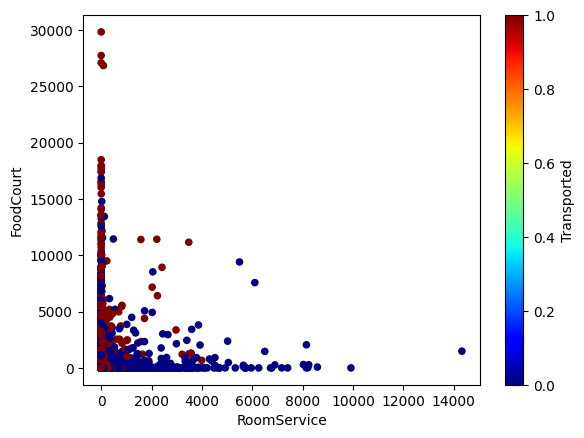

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt

train_set.plot(kind='scatter', x='RoomService', y='FoodCourt', c='Transported', cmap=plt.get_cmap('jet'))

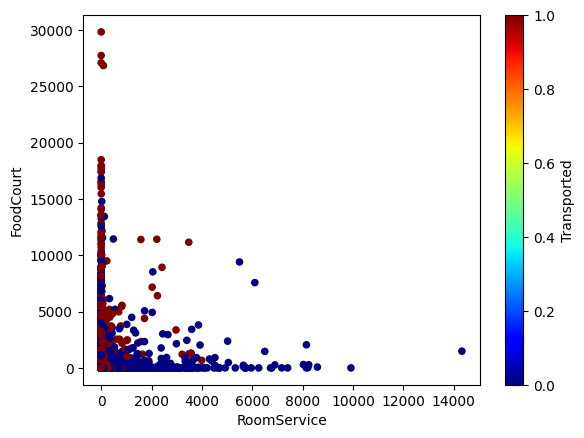

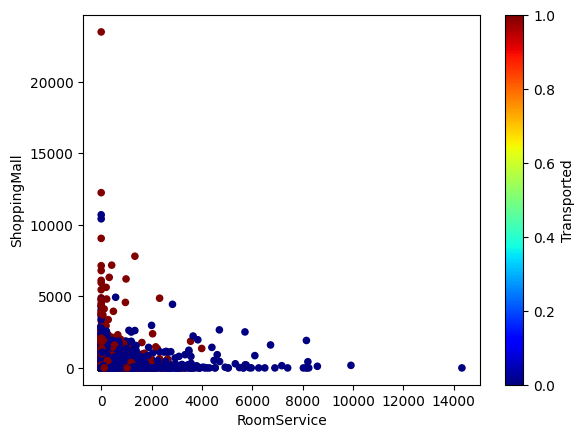

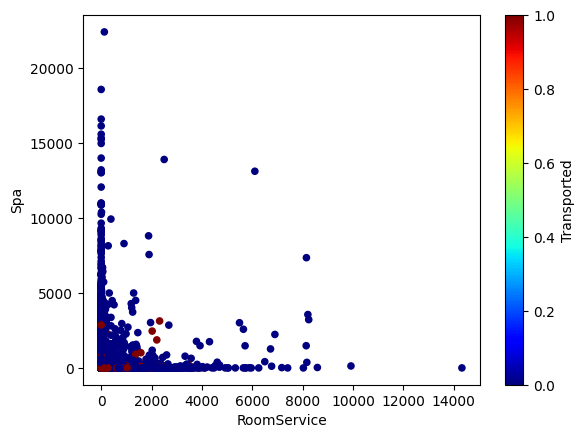

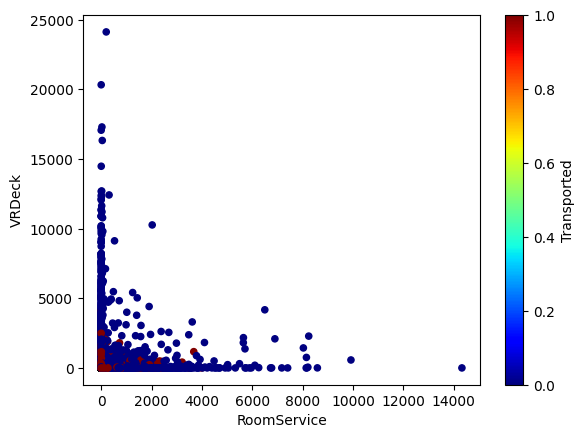

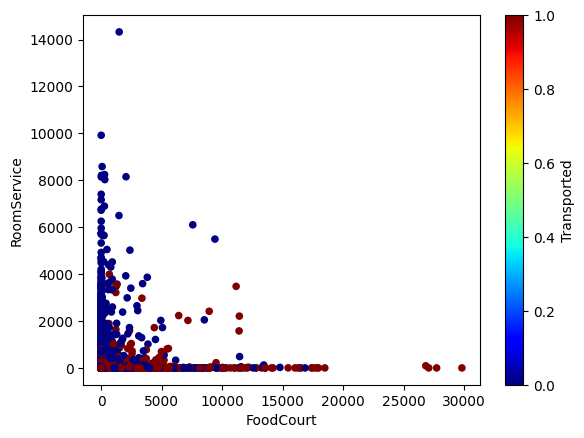

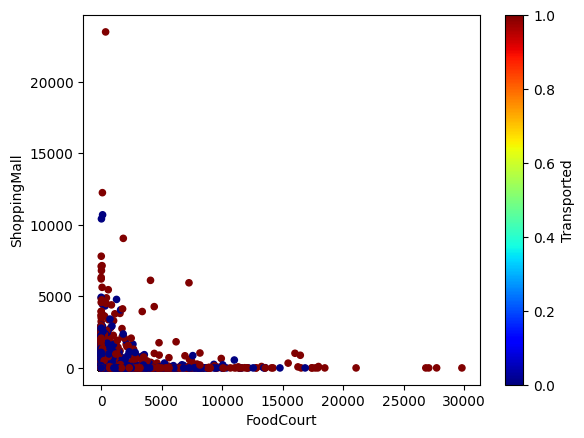

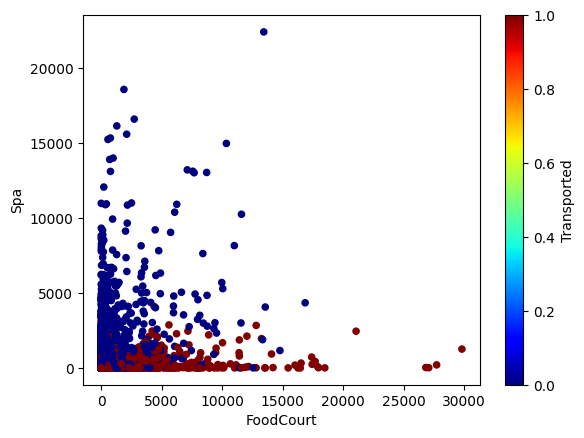

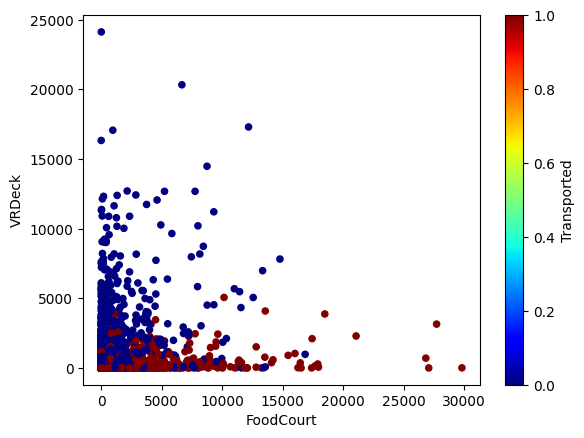

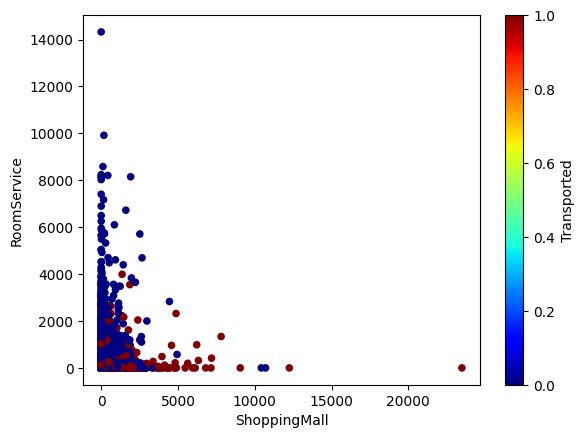

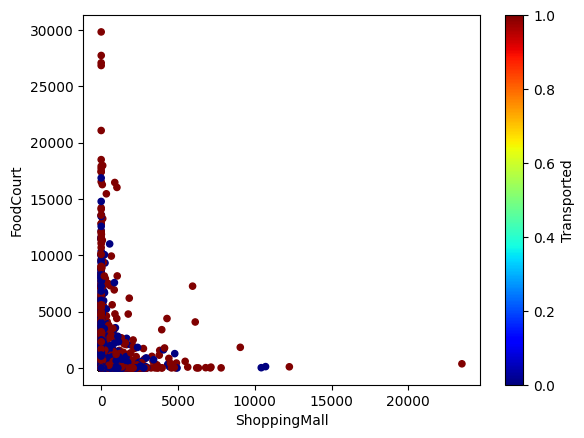

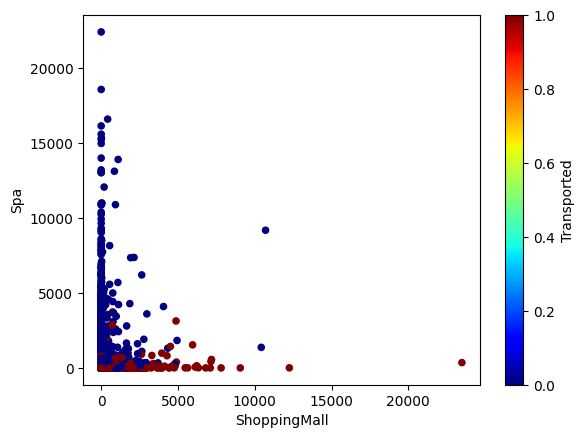

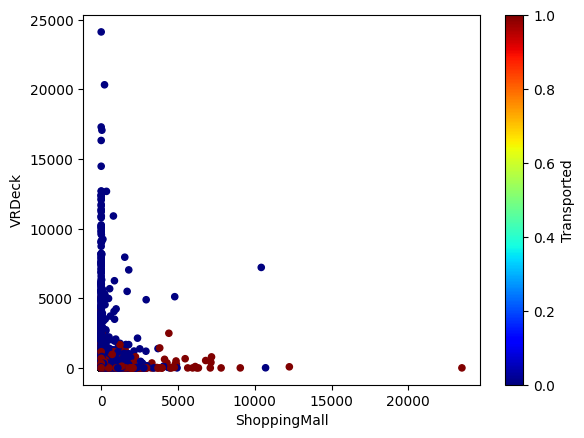

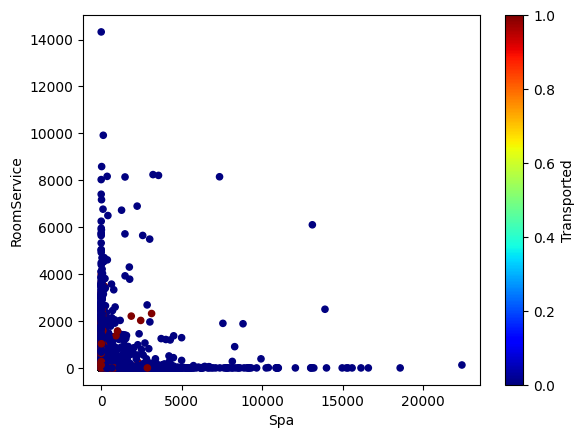

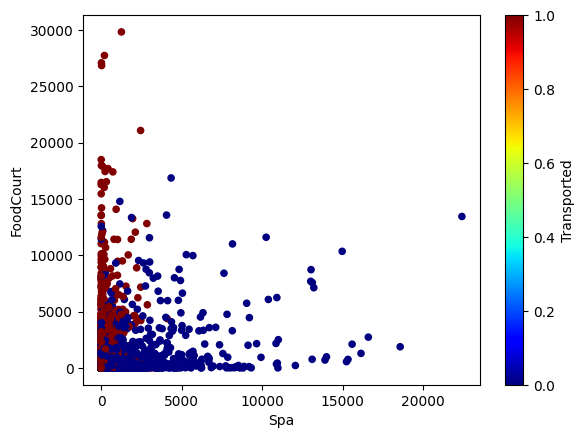

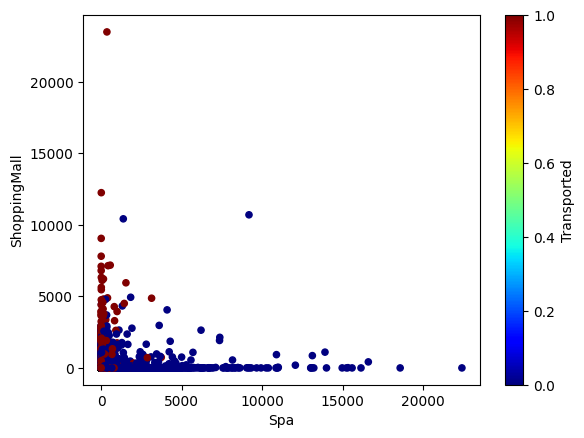

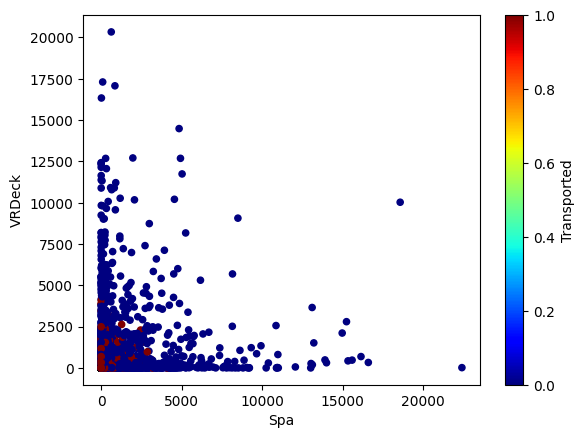

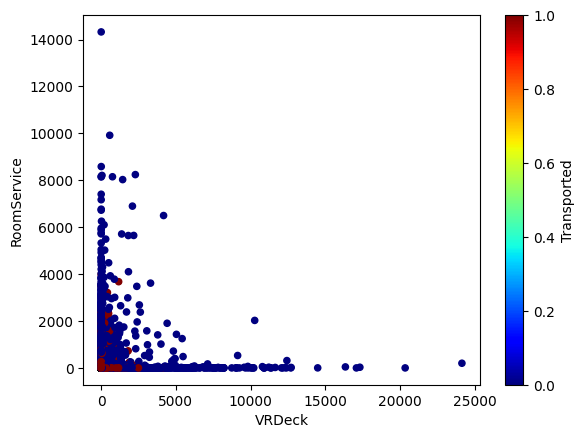

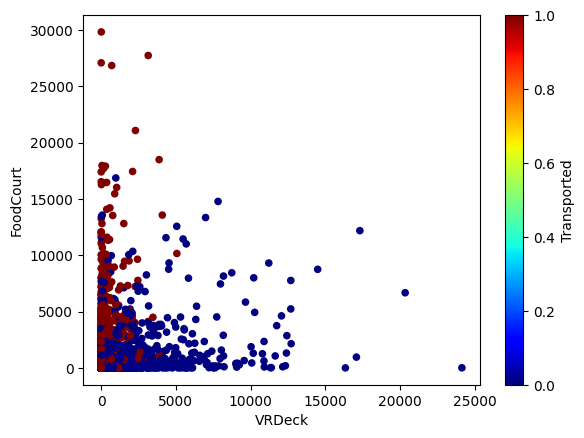

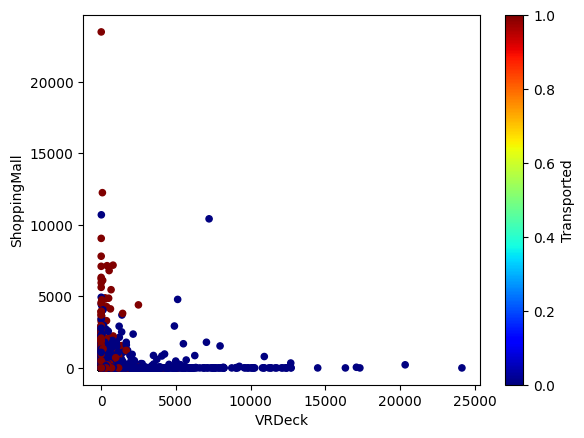

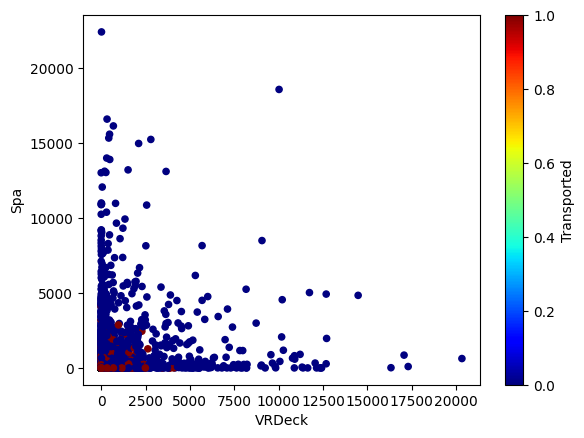

In [59]:
numeric = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for x in numeric:
    for y in numeric:
        if x != y:
            train_set.plot(kind='scatter', x=x, y=y, c='Transported',
                           cmap=plt.get_cmap('jet'))

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
for item in numeric:
    train_set[item] = scaler.fit_transform(train_set[[item]])

In [61]:
train_set.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Earth,Europa,Mars,Side,B,C,E,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,False,39.0,0.0,-0.337025,-0.284274,-0.287317,-0.273736,-0.266098,0,0.0,1.0,0.0,0,1.0,0.0,0.0,0.0,1.0,0.0
1,False,24.0,0.0,-0.173528,-0.278689,-0.245971,0.209267,-0.227692,1,0.0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0
2,False,58.0,1.0,-0.272527,1.934922,-0.287317,5.634034,-0.223327,0,0.0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0
3,False,33.0,0.0,-0.337025,0.511931,0.326250,2.655075,-0.097634,0,0.0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0
4,False,16.0,0.0,0.117466,-0.240833,-0.037590,0.223344,-0.264352,1,0.0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0


In [63]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_set["Age"] = scaler.fit_transform(train_set[["Age"]])

In [64]:
train_set.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Earth,Europa,Mars,Side,B,C,E,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,False,0.493671,0.0,-0.337025,-0.284274,-0.287317,-0.273736,-0.266098,0,0.0,1.0,0.0,0,1.0,0.0,0.0,0.0,1.0,0.0
1,False,0.303797,0.0,-0.173528,-0.278689,-0.245971,0.209267,-0.227692,1,0.0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0
2,False,0.734177,1.0,-0.272527,1.934922,-0.287317,5.634034,-0.223327,0,0.0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0
3,False,0.417722,0.0,-0.337025,0.511931,0.326250,2.655075,-0.097634,0,0.0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0
4,False,0.202532,0.0,0.117466,-0.240833,-0.037590,0.223344,-0.264352,1,0.0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0


In [67]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CryoSleep      8476 non-null   object 
 1   Age            8514 non-null   float64
 2   VIP            8490 non-null   float64
 3   RoomService    8512 non-null   float64
 4   FoodCourt      8510 non-null   float64
 5   ShoppingMall   8485 non-null   float64
 6   Spa            8510 non-null   float64
 7   VRDeck         8505 non-null   float64
 8   Transported    8693 non-null   int32  
 9   Earth          8693 non-null   float64
 10  Europa         8693 non-null   float64
 11  Mars           8693 non-null   float64
 12  Side           8693 non-null   int64  
 13  B              8693 non-null   float64
 14  C              8693 non-null   float64
 15  E              8693 non-null   float64
 16  55 Cancri e    8693 non-null   float64
 17  PSO J318.5-22  8693 non-null   float64
 18  TRAPPIST

In [68]:
train_set.corr()

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Earth,Europa,Mars,Side,B,C,E,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
Age,1.000000,0.092819,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026,NaN,NaN,NaN,0.010862,0.104058,0.127957,0.028638,NaN,NaN,NaN
VIP,0.092819,1.000000,0.058785,0.129799,0.018295,0.061059,0.125974,-0.037650,NaN,NaN,NaN,-0.011010,0.065237,0.066555,-0.013362,NaN,NaN,NaN
RoomService,0.068723,0.058785,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611,NaN,NaN,NaN,-0.015591,-0.065617,-0.020310,0.044106,NaN,NaN,NaN
FoodCourt,0.130421,0.129799,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566,NaN,NaN,NaN,0.019700,0.156435,0.262541,-0.039740,NaN,NaN,NaN
ShoppingMall,0.033133,0.018295,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141,NaN,NaN,NaN,-0.019041,-0.010739,0.000934,0.031655,NaN,NaN,NaN
Spa,0.123970,0.061059,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131,NaN,NaN,NaN,-0.001964,0.115679,0.165828,-0.011814,NaN,NaN,NaN
VRDeck,0.101007,0.125974,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075,NaN,NaN,NaN,-0.006890,0.123204,0.208311,-0.018676,NaN,NaN,NaN
Transported,-0.075026,-0.037650,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000,NaN,NaN,NaN,0.101455,0.144733,0.108193,-0.097965,NaN,NaN,NaN
Earth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Europa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
train_set["CryoSleep"] = train_set["CryoSleep"].astype(bool)

In [76]:
train_set["CryoSleep"] = train_set["CryoSleep"].fillna(False)
train_set["CryoSleep"] = train_set["CryoSleep"].astype(int)

In [77]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CryoSleep      8693 non-null   int32  
 1   Age            8514 non-null   float64
 2   VIP            8490 non-null   float64
 3   RoomService    8512 non-null   float64
 4   FoodCourt      8510 non-null   float64
 5   ShoppingMall   8485 non-null   float64
 6   Spa            8510 non-null   float64
 7   VRDeck         8505 non-null   float64
 8   Transported    8693 non-null   int32  
 9   Earth          8693 non-null   float64
 10  Europa         8693 non-null   float64
 11  Mars           8693 non-null   float64
 12  Side           8693 non-null   int64  
 13  B              8693 non-null   float64
 14  C              8693 non-null   float64
 15  E              8693 non-null   float64
 16  55 Cancri e    8693 non-null   float64
 17  PSO J318.5-22  8693 non-null   float64
 18  TRAPPIST

In [78]:
train_set['CryoSleep'].value_counts()

0    5439
1    3254
Name: CryoSleep, dtype: int64

In [80]:
for column in ["VIP", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]:
    train_set[column] = train_set[column].fillna(0)
mean_age = train_set["Age"].mean()
train_set["Age"] = train_set["Age"].fillna(mean_age)
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CryoSleep      8693 non-null   int32  
 1   Age            8693 non-null   float64
 2   VIP            8693 non-null   float64
 3   RoomService    8693 non-null   float64
 4   FoodCourt      8693 non-null   float64
 5   ShoppingMall   8693 non-null   float64
 6   Spa            8693 non-null   float64
 7   VRDeck         8693 non-null   float64
 8   Transported    8693 non-null   int32  
 9   Earth          8693 non-null   float64
 10  Europa         8693 non-null   float64
 11  Mars           8693 non-null   float64
 12  Side           8693 non-null   int64  
 13  B              8693 non-null   float64
 14  C              8693 non-null   float64
 15  E              8693 non-null   float64
 16  55 Cancri e    8693 non-null   float64
 17  PSO J318.5-22  8693 non-null   float64
 18  TRAPPIST

In [84]:
train_set.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [82]:
train_set = train_set_oryginal.copy()

In [83]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [72]:
train_set.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [2]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

class MyTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        self.home_planet_enc = OneHotEncoder()
        self.home_planet_enc.fit(X[['HomePlanet']])
        self.destination_enc = OneHotEncoder()
        self.destination_enc.fit(X[['Destination']])
        self.paid_scaler = StandardScaler()
        self.paid_scaler.fit(X[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]])
        self.mean_age = X["Age"].mean()
        self.age_scaler = MinMaxScaler()
        self.age_scaler.fit(X[["Age"]])
        return self
    def transform(self, X):
        home_planet_cat = self.home_planet_enc.transform(X[['HomePlanet']])
        for i, cat in enumerate(self.home_planet_enc.categories_):
            X[cat] = home_planet_cat.toarray()[:][i]
        X = X.drop([np.nan], axis=1)
        destination_cat = self.destination_enc.transform(X[['Destination']])
        for i, cat in enumerate(self.destination_enc.categories_):
            X[cat] = destination_cat.toarray()[:][i]
        X = X.drop([np.nan], axis=1)
        X['CryoSleep'].fillna(value=False, inplace=True)
        X['CryoSleep'] = X['CryoSleep'].astype(int)
        X['VIP'].fillna(value=False, inplace=True)
        X['VIP'] = X['VIP'].astype(int)
        for column in ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]:
            X[column] = X[column].fillna(0)
        X[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]] = self.paid_scaler.transform(X[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]])
        X["Age"] = X["Age"].fillna(self.mean_age)
        X["Age"] = self.age_scaler.transform(X[["Age"]])
        X['Side'] = [cabin.split('/')[2] if cabin is not np.nan else np.nan
                                      for cabin in X['Cabin']]
        X['Side'] = [1 if side == 'S' else 0 for side in X['Side']]
        X = X.drop(['PassengerId', 'HomePlanet', 'Destination', 'Name', 'Cabin'], axis=1)
        return X

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

fullpipeline = Pipeline([
    ('mytransformer', MyTransformer())
])

In [4]:
train_set = fullpipeline.fit_transform(train_set)

In [5]:
train_set.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,Side
0,0,0.493671,0,-0.337025,-0.284274,-0.287317,-0.273736,-0.266098,False,0.0,1.0,0.0,0.0,0.0,1.0,0
1,0,0.303797,0,-0.173528,-0.278689,-0.245971,0.209267,-0.227692,True,0.0,1.0,0.0,0.0,0.0,1.0,1
2,0,0.734177,1,-0.272527,1.934922,-0.287317,5.634034,-0.223327,False,0.0,1.0,0.0,0.0,0.0,1.0,1
3,0,0.417722,0,-0.337025,0.511931,0.326250,2.655075,-0.097634,False,0.0,1.0,0.0,0.0,0.0,1.0,1
4,0,0.202532,0,0.117466,-0.240833,-0.037590,0.223344,-0.264352,True,0.0,1.0,0.0,0.0,0.0,1.0,1


In [6]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CryoSleep      8693 non-null   int32  
 1   Age            8693 non-null   float64
 2   VIP            8693 non-null   int32  
 3   RoomService    8693 non-null   float64
 4   FoodCourt      8693 non-null   float64
 5   ShoppingMall   8693 non-null   float64
 6   Spa            8693 non-null   float64
 7   VRDeck         8693 non-null   float64
 8   Transported    8693 non-null   bool   
 9   Earth          8693 non-null   float64
 10  Europa         8693 non-null   float64
 11  Mars           8693 non-null   float64
 12  55 Cancri e    8693 non-null   float64
 13  PSO J318.5-22  8693 non-null   float64
 14  TRAPPIST-1e    8693 non-null   float64
 15  Side           8693 non-null   int64  
dtypes: bool(1), float64(12), int32(2), int64(1)
memory usage: 959.4 KB


<AxesSubplot:xlabel='Conducive', ylabel='Unfavorable'>

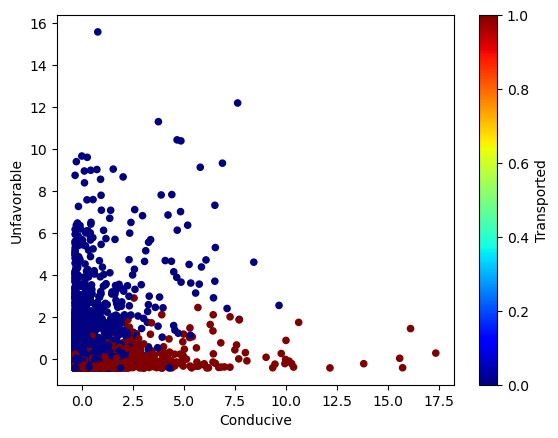

In [185]:
train_set.plot(kind='scatter', x='Conducive', y='Unfavorable', c='Transported',
                    cmap=plt.get_cmap('jet'))

In [7]:
X_train = train_set.drop(['Transported'], axis=1)
y_train = train_set['Transported'].copy()

In [8]:
#regresja liniowa
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

sgd_clf = SGDClassifier()
score = cross_val_score(sgd_clf, X_train, y_train, scoring='accuracy', cv=5)

In [9]:
score

array([0.7653824 , 0.7653824 , 0.78723404, 0.77790564, 0.78653625])

In [10]:
#regresja wielomianowa
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
score = cross_val_score(sgd_clf, X_train_poly, y_train, scoring='accuracy', cv=5)

In [11]:
score

array([0.76768258, 0.7786084 , 0.78148361, 0.79171461, 0.53624856])

In [12]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
score = cross_val_score(log_reg, X_train, y_train, scoring='accuracy', cv=5)

In [13]:
score

array([0.7653824 , 0.77400805, 0.79240943, 0.7853855 , 0.79286536])

In [14]:
from sklearn.svm import SVC

svc = SVC(random_state=42)
score = cross_val_score(svc, X_train, y_train, scoring='accuracy', cv=5)

In [ ]:
score

In [21]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(svc, [{"kernel": ["rbf"]}, {"kernel": ["poly"], "degree": [2, 3, 5, 7]}],
                   scoring="accuracy")
clf.fit(X_train, y_train)
clf.best_estimator_

SVC(random_state=42)

In [23]:
clf.best_score_

0.7931694272927776

In [16]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
score = cross_val_score(tree_clf, X_train, y_train, scoring='accuracy', cv=5)

In [17]:
score

array([0.72857964, 0.7280046 , 0.74353076, 0.74626007, 0.73360184])

In [18]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42, max_depth=8)
score = cross_val_score(rfc, X_train, y_train, scoring='accuracy', cv=5)

In [19]:
score

array([0.78320874, 0.77918344, 0.78780909, 0.8118527 , 0.79401611])

In [24]:
clf = GridSearchCV(RandomForestClassifier(), {"n_estimators": [100, 200, 300], "max_depth": [2, 3, 5, 7, 9]},
                    scoring="accuracy")
clf.fit(X_train, y_train)
clf.best_estimator_

RandomForestClassifier(max_depth=9, n_estimators=200)

In [25]:
clf.best_score_

0.7917888605742094

In [26]:
clf = GridSearchCV(RandomForestClassifier(), {"n_estimators": [150, 200, 250], "max_depth": [9, 10, None, 12]},
                    scoring="accuracy")
clf.fit(X_train, y_train)
clf.best_estimator_

RandomForestClassifier(max_depth=9, n_estimators=250)

In [27]:
clf.best_score_

0.7927094589631623

In [28]:
rfc = RandomForestClassifier(random_state=250, max_depth=9)
score = cross_val_score(rfc, X_train, y_train, scoring='accuracy', cv=5)
score

array([0.77803335, 0.78033353, 0.79298447, 0.81933257, 0.79228999])

In [36]:
fullpipeline.fit(train_set)

Pipeline(steps=[('mytransformer', MyTransformer())])

In [41]:
passengerid = test_set["PassengerId"].copy()
X_test = fullpipeline.transform(test_set)
y_pred = clf.best_estimator_.predict(X_test)

output = pd.DataFrame({'PassengerId': passengerid, 'Transported': y_pred})
output.to_csv('spaceship_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [43]:
from sklearn.ensemble import VotingClassifier

vtc = VotingClassifier([("clf.best_estimator_", clf.best_estimator_), ("svc", svc), ("log_reg", log_reg)])
score = cross_val_score(vtc, X_train, y_train, scoring='accuracy', cv=5)
score

array([0.77803335, 0.78723404, 0.80046003, 0.81357883, 0.7986191 ])

In [49]:
vtc = VotingClassifier([("rfc", rfc), ("svc", svc), ("log_reg", log_reg)])
score = cross_val_score(vtc, X_train, y_train, scoring='accuracy', cv=5)
score

array([0.77630822, 0.78953422, 0.80046003, 0.81357883, 0.79919448])

In [54]:
passengerid = test_set["PassengerId"].copy()
X_test = fullpipeline.transform(test_set)
vtc.fit(X_train, y_train)
y_pred = vtc.predict(X_test)

output = pd.DataFrame({'PassengerId': passengerid, 'Transported': y_pred})
output.to_csv('spaceship_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [46]:
clf = GridSearchCV(svc, {"C": [1, 2, 3]},
                   scoring="accuracy")
clf.fit(X_train, y_train)
clf.best_estimator_

SVC(C=1, random_state=42)

In [48]:
vtc = VotingClassifier([("svc", svc), ("log_reg", log_reg)])
score = cross_val_score(vtc, X_train, y_train, scoring='accuracy', cv=5)
score

array([0.76595745, 0.77458309, 0.79298447, 0.78078251, 0.79286536])

In [53]:
vtc = VotingClassifier([("rfc", rfc), ("svc", SVC(probability=True)), ("log_reg", log_reg)], voting="soft")
score = cross_val_score(vtc, X_train, y_train, scoring='accuracy', cv=5)
score

array([0.77515814, 0.78148361, 0.79988499, 0.8164557 , 0.80149597])

In [56]:
vtc = VotingClassifier([("rfc", RandomForestClassifier(n_estimators=300, max_depth=8)), ("svc", SVC(probability=True)), ("log_reg", log_reg)], voting="soft")
score = cross_val_score(vtc, X_train, y_train, scoring='accuracy', cv=5)
score

array([0.77918344, 0.78378378, 0.79988499, 0.81530495, 0.80034522])

In [57]:
vtc = VotingClassifier([("rfc", RandomForestClassifier(n_estimators=300, max_depth=6)), ("svc", SVC(probability=True)), ("log_reg", log_reg)], voting="soft")
score = cross_val_score(vtc, X_train, y_train, scoring='accuracy', cv=5)
score

array([0.77688327, 0.786659  , 0.79873491, 0.81530495, 0.79919448])

In [58]:
passengerid = test_set["PassengerId"].copy()
X_test = fullpipeline.transform(test_set)
vtc = vtc = VotingClassifier([("rfc", RandomForestClassifier(n_estimators=300, max_depth=8)),
                              ("svc", SVC(probability=True)), ("log_reg", log_reg)], voting="soft")
vtc.fit(X_train, y_train)
y_pred = vtc.predict(X_test)

output = pd.DataFrame({'PassengerId': passengerid, 'Transported': y_pred})
output.to_csv('spaceship_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [60]:
vtc = VotingClassifier([("rfc", RandomForestClassifier(n_estimators=350, max_depth=8)), ("svc", SVC(probability=True)), ("log_reg", log_reg)], voting="soft")
score = cross_val_score(vtc, X_train, y_train, scoring='accuracy', cv=5)
score

array([0.77918344, 0.78493387, 0.80046003, 0.81530495, 0.7986191 ])

In [61]:
vtc = VotingClassifier([("rfc", RandomForestClassifier(n_estimators=400, max_depth=8)), ("svc", SVC(probability=True)), ("log_reg", log_reg)], voting="soft")
score = cross_val_score(vtc, X_train, y_train, scoring='accuracy', cv=5)
score

array([0.77688327, 0.78320874, 0.79988499, 0.81530495, 0.79976985])

In [62]:
passengerid = test_set["PassengerId"].copy()
X_test = fullpipeline.transform(test_set)
vtc = VotingClassifier([("rfc", RandomForestClassifier(n_estimators=350, max_depth=8)),
                        ("svc", SVC(probability=True)), ("log_reg", log_reg)], voting="soft")
vtc.fit(X_train, y_train)
y_pred = vtc.predict(X_test)

output = pd.DataFrame({'PassengerId': passengerid, 'Transported': y_pred})
output.to_csv('spaceship_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
